In [1]:
import matplotlib
import mne
import pandas as pd
import re #regex library to format fast to read into pd
import os
import neurokit2 as nk
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False
import feather

import numpy as np
import platform


from scipy.stats import ttest_ind

from scipy import stats

from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,


                       permutation_t_test, permutation_cluster_1samp_test,spatio_temporal_cluster_1samp_test)
import sys
if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell.
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

#
#
#os.chdir('d:/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('c:/Users/Engi/all/BBC/WP1/data/Code/python/tsk_processing_1/base')
#os.chdir('/Users/leupinv/switchdrive/BBC/WP1/data/Code/python/tsk_processing_1/base')
from base.files_in_out import getListOfFiles,GetFiles
from stats_helper import filter_list, tTest_ana, filter_list_equal
import t_tests_cluster as clus
import t_tests_permutation as perm
import stats_helper as s_hp

/Applications/anaconda3/envs/mne_1_3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Applications/anaconda3/envs/mne_1_3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%load_ext autoreload
%autoreload 2

plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

In [3]:
g_num=None
eeg_format='-ave.fif'
eeg_exp='tsk'
datafolder='ana/MNE/evo_list'


#files = getListOfFiles(datafolder,g_num)

files = GetFiles(datafolder,g_num=g_num,eeg_format=eeg_format)

evo_files=files.fflist

# Topohraphic t tests

In [ ]:
#label=' inh vs exh unaware maskoff'
HEP_type='R2'
cond1=mne.read_evokeds(filter_list_equal(evo_files,f'maskON_correct_cfa_hep_norm_{HEP_type}_aware_list'))
cond2=mne.read_evokeds(filter_list_equal(evo_files,f'maskON_correct_cfa_hep_norm_{HEP_type}_unaware_list'))

In [ ]:
cond1gavg=mne.grand_average(cond1)
cond2gavg=mne.grand_average(cond2)

In [ ]:
cond1gavg.plot_joint()


In [ ]:
cond2gavg.plot_joint()

In [ ]:
diff_evk=mne.combine_evoked([cond1gavg,cond2gavg],weights=[1,-1]).plot_joint()

In [ ]:
%matplotlib qt
data_shape=[-0.1,1]
topolimits=[-3,3]
time_plot='peaks'
png=f'{HEP_type}_CACU'
ts,ps=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=False,plot_times='peaks',
                averages=0.015,p_val=0.01,topo_limits=topolimits)

In [ ]:
3data_shape=[-0.1,0.5]
clus.tTest_TFCE_ana([cond1,cond2],crop_value=data_shape,plot_times='peaks',averages=0.02,TFCE=False,permutations=5000,p_val=0.001)

In [ ]:
#label=' inh vs exh unaware maskoff'

cond1=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_RRCA_list'))
cond2=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_RRCU_list'))

In [ ]:
cond1gavg=mne.grand_average(cond1)
cond2gavg=mne.grand_average(cond2)

In [ ]:
cond1gavg.plot_joint()


In [ ]:
%matplotlib qt
data_shape=[-0.1,1]
topolimits=[-3,3]
time_plot='peaks'
#png=f'{HEP_type}_CACU'
ts,ps=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=False,plot_times='peaks',
                averages=0.015,p_val=0.01,topo_limits=topolimits)

In [ ]:
data_shape=[-0.1,0.8]
clus.tTest_TFCE_ana([cond1,cond2],crop_value=data_shape,plot_times='peaks',averages=0.02,TFCE=False,permutations=5000,p_val=0.05)

# Waveform topography
explore topography which repeats across different codnitoins including negative and positive pole


In [ ]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [ ]:
%matplotlib qt
HEP_type='RR'
cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}CA_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}CU_list'))
#cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}_aware_list'))
#cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}_unaware_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_HEP_pos=['D5','D6','D7','D8','D9','D10','D11','D12','D19','D20','D21']
picks_HEP_neg=['B21','B22','B23','B24','B19','B18','B17','B16','B3','B4']
picks_P1=['D32','A11','A12','A13','A14','A24','A25','A26','A27','B8','B9','B10']

picks_P1_oral=['A13','A14','A15','A16','A21','A22','A23','A24','A25','A26','A27','A28','A29']

picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']

picks_P3a=['C11','C12','C13','C14','C15','C18','C19','C20','C21','C22','C25','C26','C27','C28','C32','D4']

crop_value=[-0.1,0.8]

cond_1,cond_2=crop_list([cond_1,cond_2],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{HEP_type}_aware"
cond_2_lab=f"{HEP_type}_unaware"
#cond_3_lab="oral aware exh"
#cond_4_lab="oral unaware exh"
evokeds = {f"{cond_1_lab}":cond_1,

           f"{cond_2_lab}":cond_2
           }

            #f"{cond_3_lab}":cond_3,

           #f"{cond_4_lab}":cond_4






In [ ]:
%matplotlib qt

colors_pos=['tab:orange','r']
colors_neg=['blue','c']

fig,ax=plt.subplots(2)
fig_evo=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picks_HEP_pos,show_sensors=True,colors=colors_pos,
                                     styles={f"{cond_1_lab}":{"linewidth":1.5},f"{cond_2_lab}":{"linewidth":1.5}},
                                    legend='upper right',linestyles=['--','-','--','-'],truncate_yaxis=False,axes=ax[0])

mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picks_HEP_neg,show_sensors=True,colors=colors_neg,
                                     styles={f"{cond_1_lab}":{"linewidth":1.5},f"{cond_2_lab}":{"linewidth":1.5}},
                                     legend='upper right',linestyles=['--','-','--','-'],truncate_yaxis=False,axes=ax[1])
#ylim=dict(eeg=[-3,5.5])

#png='CACU_inhexh_VAN.png'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_evo[0].savefig(fig_path,dpi=600)




In [ ]:
fig_evo=plt.gcf()
png='inh_exh_CACU_early_right_el'
fig_path=f'ana/results_report/images/el_waveform/'
filenam=fig_path+f'/{png}.png'
#fig_evo.savefig(filenam,dpi=600,transparent=True)

Projections have already been applied. Setting proj attribute to True.


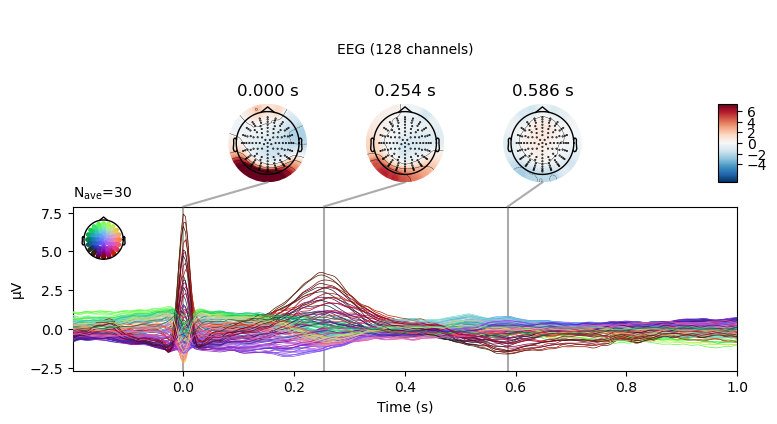

In [26]:
cond1gavg.plot_joint()


In [11]:
%matplotlib qt
data_shape=[-0.1,1]
topolimits=[-3,3]
time_plot='peaks'
#png=f'{HEP_type}_CACU'
ts,ps=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=False,plot_times='peaks',
                averages=0.015,p_val=0.01,topo_limits=topolimits)

(30, 128, 283)
(30, 128, 283)
-0.1


In [14]:
data_shape=[-0.1,0.8]
clus.tTest_TFCE_ana([cond1,cond2],crop_value=data_shape,plot_times='peaks',averages=0.02,TFCE=False,permutations=5000,p_val=0.05)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 128
(128, 232)
(30, 232, 128)
(128, 232)
(30, 232, 128)
stat_fun(H1): min=-5.878738 max=5.765438
Running initial clustering
Found 98 clusters
Permuting 4999 times...


  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


(array([[-0.55116603, -0.20000005, -0.11077791, ..., -0.98555815,
          1.04449402,  0.43007869],
        [-0.90305606, -0.37396302, -0.42134336, ..., -0.74600682,
          1.42838698,  0.72551959],
        [-1.21538644, -0.53438583, -0.66956181, ..., -0.66913225,
          1.58663598,  0.9350279 ],
        ...,
        [-0.79672212, -0.16801392,  1.17878236, ...,  2.2090976 ,
          1.36131031,  0.51979463],
        [-0.94109801, -0.23136559,  1.22231118, ...,  2.4173696 ,
          1.71759158,  0.72563565],
        [-1.1768241 , -0.39948454,  1.07836201, ...,  2.41064125,
          1.69143429,  0.65119116]]),
 [array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  array([

# Waveform topography
explore topography which repeats across different codnitoins including negative and positive pole


In [20]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [43]:
%matplotlib qt
HEP_type='RR'
cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}CA_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}CU_list'))
#cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}_aware_list'))
#cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'maskOFF_correct_cfa_hep_norm_{HEP_type}_unaware_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_HEP_pos=['D5','D6','D7','D8','D9','D10','D11','D12','D19','D20','D21']
picks_HEP_neg=['B21','B22','B23','B24','B19','B18','B17','B16','B3','B4']
picks_P1=['D32','A11','A12','A13','A14','A24','A25','A26','A27','B8','B9','B10']

picks_P1_oral=['A13','A14','A15','A16','A21','A22','A23','A24','A25','A26','A27','A28','A29']

picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']

picks_P3a=['C11','C12','C13','C14','C15','C18','C19','C20','C21','C22','C25','C26','C27','C28','C32','D4']

crop_value=[-0.1,0.8]

cond_1,cond_2=crop_list([cond_1,cond_2],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{HEP_type}_aware"
cond_2_lab=f"{HEP_type}_unaware"
#cond_3_lab="oral aware exh"
#cond_4_lab="oral unaware exh"
evokeds = {f"{cond_1_lab}":cond_1,

           f"{cond_2_lab}":cond_2
           }

            #f"{cond_3_lab}":cond_3,

           #f"{cond_4_lab}":cond_4






ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/maskOFF_correct_cfa_hep_norm_RRCA_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.13 × hep/normal/correct/aware/R/exh/RRCA + 0.08 × hep/normal/correct/aware/R/inh/RRCA + 0.47 × hep/normal/correct/aware/R2/exh/RRCA + 0.32 × hep/normal/correct/aware/R2/inh/RRCA
 G_n= g01)
        0 CTF compensation matrices available
        nave = 345 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.18 × hep/normal/correct/aware/R/exh/RRCA + 0.15 × hep/normal/correct/aware/R/inh/RRCA + 0.42 × 

In [44]:
%matplotlib qt

colors_pos=['tab:orange','r']
colors_neg=['blue','c']

fig,ax=plt.subplots(2)
fig_evo=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picks_HEP_pos,show_sensors=True,colors=colors_pos,
                                     styles={f"{cond_1_lab}":{"linewidth":1.5},f"{cond_2_lab}":{"linewidth":1.5}},
                                    legend='upper right',linestyles=['--','-','--','-'],truncate_yaxis=False,axes=ax[0])

mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picks_HEP_neg,show_sensors=True,colors=colors_neg,
                                     styles={f"{cond_1_lab}":{"linewidth":1.5},f"{cond_2_lab}":{"linewidth":1.5}},
                                     legend='upper right',linestyles=['--','-','--','-'],truncate_yaxis=False,axes=ax[1])
#ylim=dict(eeg=[-3,5.5])

#png='CACU_inhexh_VAN.png'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_evo[0].savefig(fig_path,dpi=600)




More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


[<Figure size 640x480 with 4 Axes>]

In [34]:
fig_evo=plt.gcf()
png='inh_exh_CACU_early_right_el'
fig_path=f'ana/results_report/images/el_waveform/'
filenam=fig_path+f'/{png}.png'
#fig_evo.savefig(filenam,dpi=600,transparent=True)